In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv('college-data.csv')
df['founded_in'] = df['founded_in'].astype(int, errors='ignore')
df['founded_in'] = pd.to_datetime(df['founded_in'], format='%Y')
df['for_profit'] = df['for_profit'].astype(int)
# df['closed_merged_in'] = df['closed_merged_in'].astype(int, errors='ignore')
# df['closed_merged_in'] = pd.to_datetime(df['closed_merged_in'], format='%Y')

df.dtypes
# df['for_profit'] = df['for_profit'].astype(bool)
# df['religious_controlled'] = df['religious_controlled'].astype(bool)
# df.head(25)

name                            object
state                           object
location                        object
control                         object
for_profit                       int64
religious_controlled             int64
religious_orentation            object
degree_type                     object
focus                           object
founded_in              datetime64[ns]
closed_merged_in                object
done                            object
closed_reason                   object
enrollment                      object
historically_black              object
accreditation                   object
dtype: object

In [178]:
degree_types = ["Doctoral University", "Baccalaureate College", "Liberal Arts", "Masters University"]
degree_filter = df['degree_type'].isin(degree_types)

colleges = df[degree_filter]
# colleges.head(50)

In [187]:
# private_colleges = colleges[colleges['control'] == "Private"]
# private_colleges.head(25)
# non_profit_colleges = private_colleges[private_colleges['for_profit'] == 0]
# non_profit_colleges.head(25)
# secular_non_profit_colleges = non_profit_colleges[non_profit_colleges['religious_controlled'] == 0] 

secular_non_profit_colleges = colleges[
    (colleges['control'] == "Private") &
    (colleges['for_profit'] == 0) &
    (colleges['religious_controlled'] == 0) 
]
secular_non_profit_colleges.head(25)
# secular_non_profit_colleges.dtypes


,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation
2,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN
3,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN
4,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN
5,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE
6,Washington and Lee University,Virginia,Lexington,Private,0,0,Christian,Baccalaureate College,NaN,1749-01-01,NaN,AJB,NaN,"2,223",NaN,SACS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,Union College,New York,Schenectady,Private,0,0,Tennessee Baptist Convention,Baccalaureate College,NaN,1795-01-01,NaN,Jenalyn,NaN,"2,280",NaN,NaN
36,Hartwick College,New York,Oneonta,Private,0,0,none,Doctoral University,NaN,1797-01-01,NaN,Jenalyn,NaN,"1,595",NaN,NaN
41,United States Military Academy,New York,West Point,Private,0,0,Baptist,Baccalaureate College,NaN,1802-01-01,NaN,Jenalyn,NaN,"4,498",NaN,NaN
42,Baltimore College,Maryland,Baltimore,Private,0,0,none,Baccalaureate College,NaN,1803-01-01,1830,Jenalyn,NaN,NaN,NaN,NaN


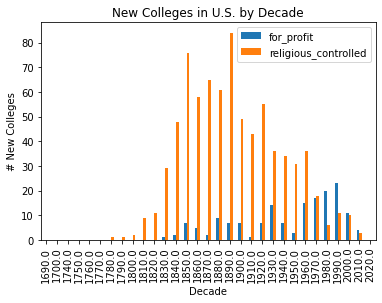

In [192]:
# Line chart of colleges founded by year
colleges_decades = colleges.groupby((colleges.founded_in.dt.year//10)*10).sum()
# print(decades)
colleges_decades.plot(kind='bar');
plt.xlabel("Decade")
plt.ylabel("# New Colleges")
plt.title("New Colleges in U.S. by Decade");

In [190]:
Line chart of colleges founded by year
secular_non_profit_colleges_decades = secular_non_profit_colleges.groupby((secular_non_profit_colleges.founded_in.dt.year//10)*10).sum()
print(secular_non_profit_colleges_decades)
secular_non_profit_colleges_decades.plot(kind='bar');
plt.xlabel("Decade")
plt.ylabel("# New Colleges")
plt.title("New Colleges in U.S. by Decade");

,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation
2,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN
3,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN
4,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN
5,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE
6,Washington and Lee University,Virginia,Lexington,Private,0,0,Christian,Baccalaureate College,NaN,1749-01-01,NaN,AJB,NaN,"2,223",NaN,SACS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,University of Notre Dame,Indiana,Notre Dame,Private,0,0,Catholic,Doctoral University,NaN,1842-01-01,NaN,Jenalyn,NaN,"12,126",NaN,"HLC, ABA, APA, ATS"
188,Olivet College,Michigan,Olivet,Private,0,0,Christian,Baccalaureate College,NaN,1844-01-01,NaN,x,NaN,"1,078",NaN,HLC
197,Baldwin Wallace University,Ohio,Berea,Private,0,0,none,Masters University,NaN,1845-01-01,NaN,Jenalyn,NaN,NaN,NaN,NaN
203,Beloit College,Wisconsin,Beloit,Private,0,0,none,Baccalaureate College,NaN,1846-01-01,NaN,Jenalyn,NaN,"1,397",NaN,HLC
